# Report Analysis

In [1]:
%matplotlib inline

In [2]:
logs_dir = '/tf/logs/sdumont/classification/voc07/rn101-randaug'
experiments = {}

## Setup

In [3]:
import os
from pprint import pprint

import numpy as np
import pandas as pd

def is_number(s):
    return all(map(str.isdigit, s))

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# sns.style('whitegrid')

## Baseline

In [6]:
for p in os.listdir(logs_dir):
    if os.path.isdir(f'{logs_dir}/{p}'):
        experiments[p] = {
            'name': p
        }

print('Experiments found:', *experiments, sep='\n  - ')

Experiments found:
  - l2
  - baseline
  - kur
  - baseline-fbn
  - ortho


In [7]:
for e in experiments:
    experiments[e]['runs'] = {
      r: {
        'run_dir': os.path.join(logs_dir, e, r)
      }
      for r in sorted(os.listdir(os.path.join(logs_dir, e)))
      if is_number(r)
    }

In [8]:
pprint(experiments)

{'baseline': {'name': 'baseline',
              'runs': {'2': {'run_dir': '/tf/logs/sdumont/classification/voc07/rn101-randaug/baseline/2'},
                       '3': {'run_dir': '/tf/logs/sdumont/classification/voc07/rn101-randaug/baseline/3'}}},
 'baseline-fbn': {'name': 'baseline-fbn',
                  'runs': {'1': {'run_dir': '/tf/logs/sdumont/classification/voc07/rn101-randaug/baseline-fbn/1'},
                           '2': {'run_dir': '/tf/logs/sdumont/classification/voc07/rn101-randaug/baseline-fbn/2'},
                           '3': {'run_dir': '/tf/logs/sdumont/classification/voc07/rn101-randaug/baseline-fbn/3'},
                           '4': {'run_dir': '/tf/logs/sdumont/classification/voc07/rn101-randaug/baseline-fbn/4'},
                           '5': {'run_dir': '/tf/logs/sdumont/classification/voc07/rn101-randaug/baseline-fbn/5'},
                           '6': {'run_dir': '/tf/logs/sdumont/classification/voc07/rn101-randaug/baseline-fbn/6'}}},
 'kur': {'name':

In [9]:
import json

for e, ex_config in experiments.items():
    for r, run_config in ex_config['runs'].items():
        print(f'Reading results for {e}:{r}')
        
        c_path = os.path.join(run_config['run_dir'], 'config.json')
        t_path = os.path.join(run_config['run_dir'], 'training.csv')
        
        if os.path.exists(c_path):
            with open(c_path) as f:
                run_config['config'] = json.load(f)
        
        if os.path.exists(t_path):
            run_config['training'] = pd.read_csv(t_path)

Reading results for l2:1
Reading results for l2:2
Reading results for l2:3
Reading results for baseline:2
Reading results for baseline:3
Reading results for kur:1
Reading results for kur:2
Reading results for kur:3
Reading results for kur:4
Reading results for kur:5
Reading results for kur:6
Reading results for baseline-fbn:1
Reading results for baseline-fbn:2
Reading results for baseline-fbn:3
Reading results for baseline-fbn:4
Reading results for baseline-fbn:5
Reading results for baseline-fbn:6
Reading results for ortho:1
Reading results for ortho:2
Reading results for ortho:3
Reading results for ortho:4
Reading results for ortho:5
Reading results for ortho:6
Reading results for ortho:7
Reading results for ortho:8


In [72]:
reports = []

for e in experiments.values():
    for r, c in e['runs'].items():
        if 'training' in c:
            reports.append(c['training'].assign(training=f"{e['name']}/{r}"))

reports = pd.concat(reports).reset_index(drop=True)

In [73]:
reports.head()

,epoch,binary_accuracy,loss,lr,precision,recall,val_binary_accuracy,val_loss,val_precision,val_recall,training
0,30,0.816206,0.811922,0.001,0.128842,0.223858,0.924279,0.642790,0.558313,0.116159,l2/3
1,31,0.926282,0.625691,0.001,0.666330,0.164380,0.930689,0.608910,0.768734,0.153509,l2/3
2,32,0.931370,0.597094,0.001,0.781642,0.201796,0.935377,0.581569,0.786596,0.230134,l2/3
3,33,0.936959,0.566677,0.001,0.847144,0.262594,0.940605,0.551940,0.842620,0.288774,l2/3
4,34,0.942428,0.537586,0.001,0.839832,0.349389,0.945052,0.526809,0.827446,0.368869,l2/3


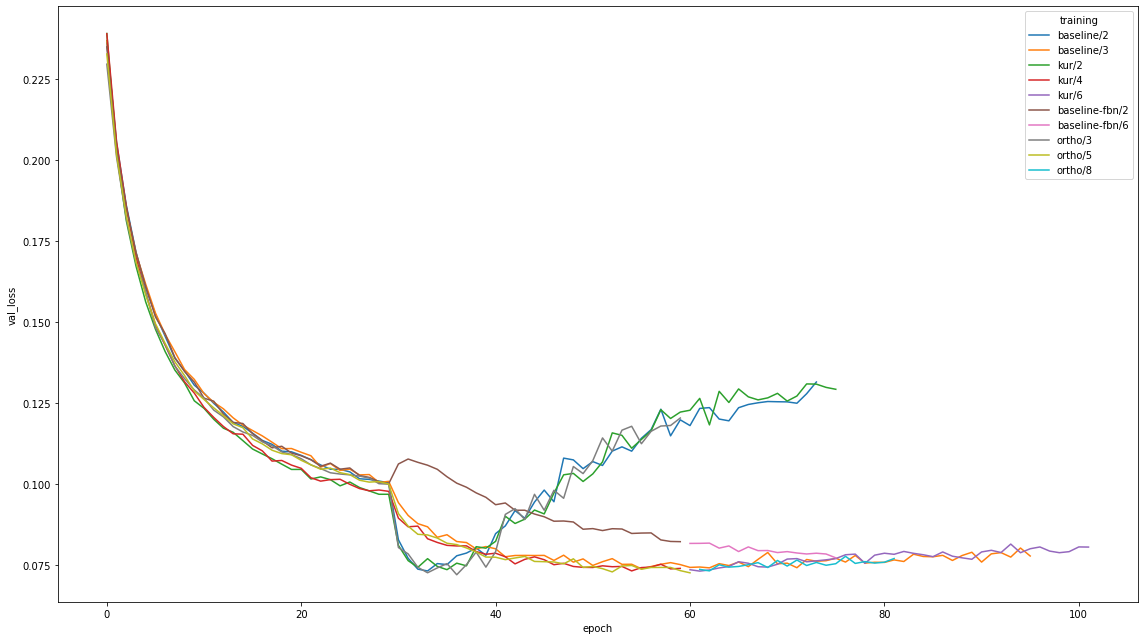

In [81]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=reports[reports.training != 'l2/3'], x='epoch', y='val_loss', hue='training')
plt.tight_layout();

In [97]:
best_checkpoints = reports.sort_values('val_loss').groupby('training', as_index=False).first()
best_checkpoints[['training', 'val_loss', 'val_precision', 'val_recall']].round(4)

,training,val_loss,val_precision,val_recall
0,baseline-fbn/2,0.0823,0.8934,0.7233
1,baseline-fbn/6,0.0773,0.8968,0.7342
2,baseline/2,0.0732,0.8696,0.7984
3,baseline/3,0.0739,0.8815,0.7826
4,kur/2,0.0736,0.8787,0.7847
5,kur/4,0.0732,0.8730,0.7880
6,kur/6,0.0732,0.8829,0.7879
7,l2/3,0.3804,0.8613,0.7245
8,ortho/3,0.0721,0.8795,0.7963
9,ortho/5,0.0726,0.8852,0.7904


In [74]:
ortho_reports = reports[reports.training.str.startswith('ortho')]
ortho_reports.iloc[ortho_reports.val_loss.argmin()]

epoch                        36
binary_accuracy        0.985136
loss                   0.042081
lr                         0.01
precision              0.946145
recall                 0.863954
val_binary_accuracy    0.975701
val_loss                0.07205
val_precision          0.879521
val_recall             0.796287
training                ortho/3
Name: 480, dtype: object

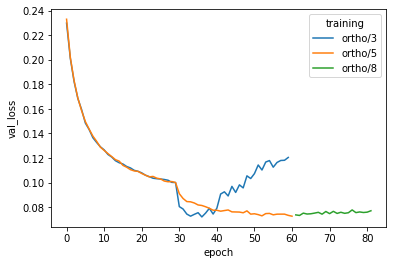

In [75]:
sns.lineplot(data=ortho_reports, x='epoch', y='val_loss', hue='training');

,training,epoch,binary_accuracy,loss,lr,precision,recall,val_binary_accuracy,val_loss,val_precision,val_recall
0,ortho/3,36,0.9851,0.0421,0.010,0.9461,0.8640,0.9757,0.0721,0.8795,0.7963
1,ortho/5,60,0.9827,0.0477,0.001,0.9365,0.8421,0.9758,0.0726,0.8852,0.7904
2,ortho/8,62,0.9828,0.0478,0.001,0.9402,0.8394,0.9752,0.0732,0.8667,0.8051
